<a href="https://colab.research.google.com/github/ant9398/Personnal/blob/Titanic-ML/Titanic_EDA_%2B_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
url = 'https://raw.githubusercontent.com/ant9398/Personnal/Titanic-ML/train.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

In [ ]:
url = 'https://raw.githubusercontent.com/ant9398/Personnal/Titanic-ML/test.csv'
submitset = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

### Variable Notes ###
**pclass**: A proxy for socio-economic status (SES):

    -1st = Upper
    -2nd = Middle
    -3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: number of siblings/spouse aboard

**parch**: number of parents/children aboard

In [ ]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

#### Global Analysis:

*   **Target**: Survived 
*   **Shape**: 891 rows and 11 columns
*   **Variable types**: 5 qualitatives, 6 quantitatives
*   **Missing Values Analysis**: 

    - 8 complete variables
    - 2 variables with >20% missing data 
    - 'Cabin' has 77% missing data

#### In-Depth Analysis:

*   **Target Visualisation**: 38% of survivors
*   **Variables Meaning**: 

    - Name and Ticket are ID variables; they wil be dropped
    - 'Fare' has right-skewed distribution
    - 72% of passengers have Southampton as port of embarkation
*   **Target/pclass**: Apparently, people from the lower class had way less chances to survive than the others
*   **Target/family on board**: it also seems like that people that were alone on the Titanic had less chances to survive than people with atleast a family member aboard
*   **Target/Sex**: It seems like women were highly prioritized during rescue
*   **Target/Embarked**: It seems like people who embarked at Southampton had higher chance of dieing from the naufrage. Maybe relation between Embarked/Sex?
*   **Cabin**: Initially, lots of missing data in the variable and cabin numbers for the rest, hard to interpret. We created 'Cabin_info' which indicates if the cabin number is known for the passenger, and we observe that people with unknown cabin number have higher survival rate in the train set



















## Global Analysis

In [ ]:
df = data.copy()

In [ ]:
df.shape

(891, 11)

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
df.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

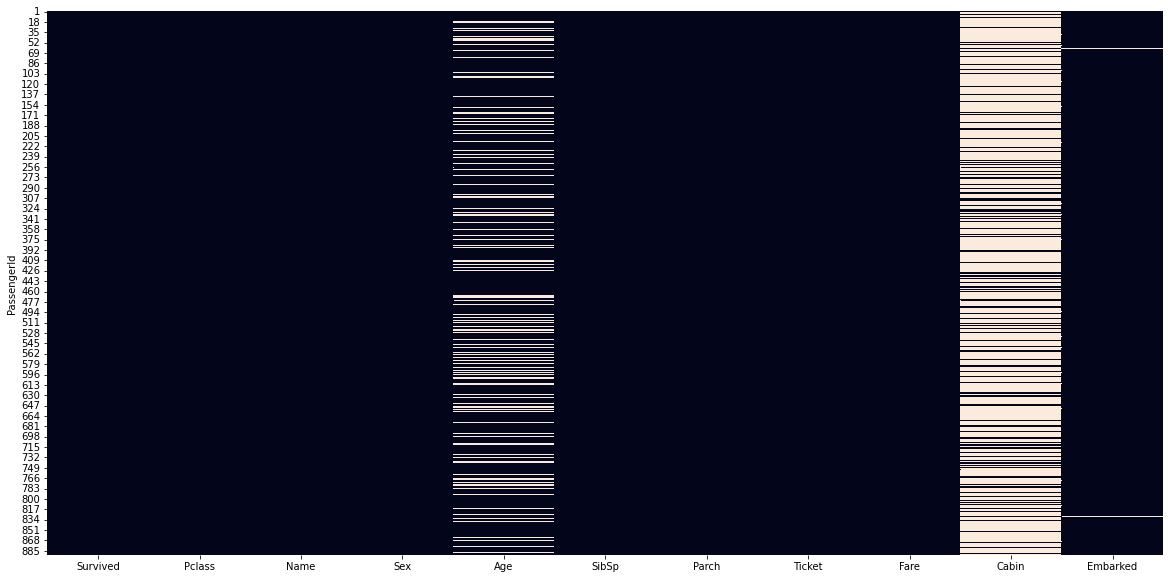

In [ ]:
#white area is missing data
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
Age         0.198653
Cabin       0.771044
dtype: float64

## In-Depth Analysis

In [ ]:
categorical = df.select_dtypes('object')
numerical = df.select_dtypes('number')
float_columns =df.columns[df.dtypes=='float']
df.dtypes.reset_index()

,index,0
0,Survived,int64
1,Pclass,int64
2,Name,object
3,Sex,object
4,Age,float64
5,SibSp,int64
6,Parch,int64
7,Ticket,object
8,Fare,float64
9,Cabin,object


In [ ]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

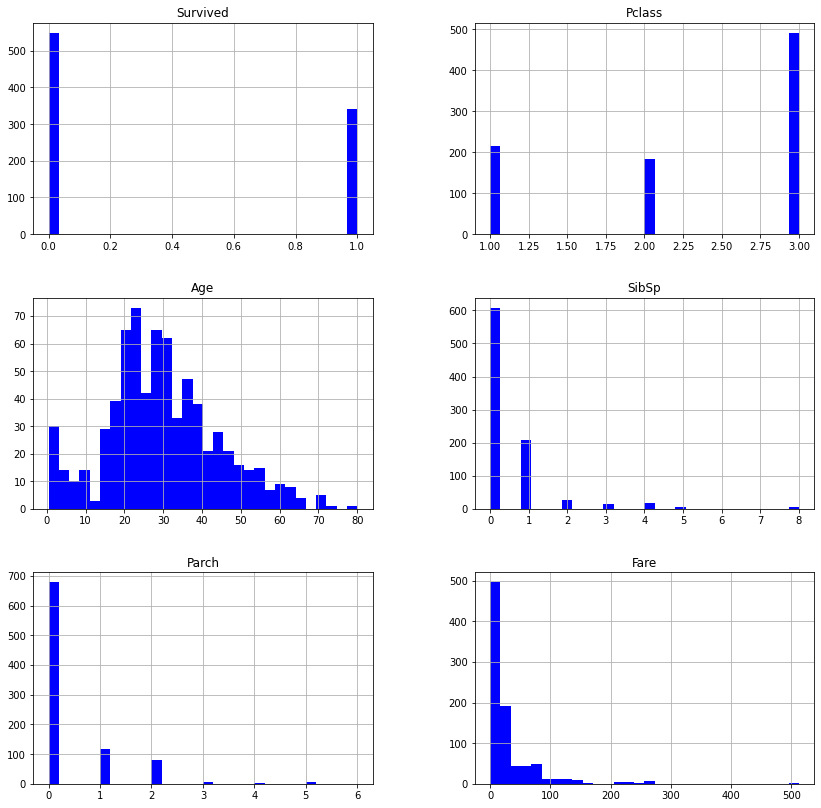

In [ ]:
df.hist(bins = 30, figsize = (14,14), color = 'b');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


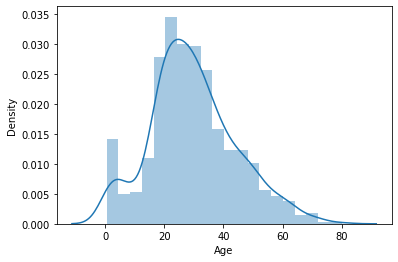

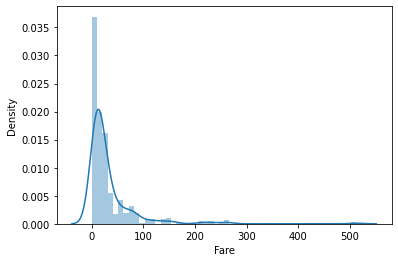

In [ ]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Name---------------------------------------------- ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles A

In [ ]:
#for cat in categorical:
#  if (cat != 'Id'):
#    sn.countplot(data = df, x = cat)
#    plt.xticks(rotation=30)
#    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


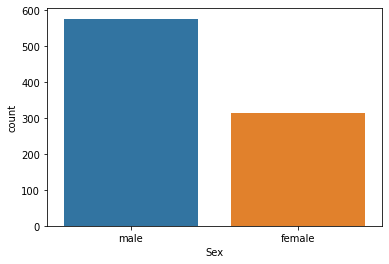

In [ ]:
sns.countplot(df['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


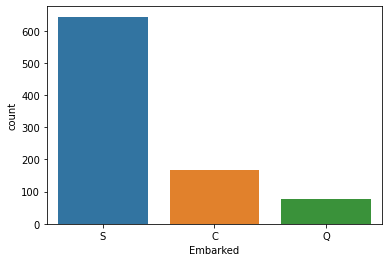

In [ ]:
sns.countplot(df['Embarked'])

In [ ]:
df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

### Target/Variables Relation

In [ ]:
survived_df = df[df['Survived'] == 1]
died_df = df[df['Survived'] == 0]
ticket_na = df[pd.isnull(df['Ticket'])]
ticket_notna = df[pd.notnull(df['Ticket'])]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

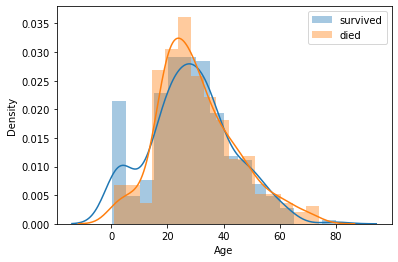

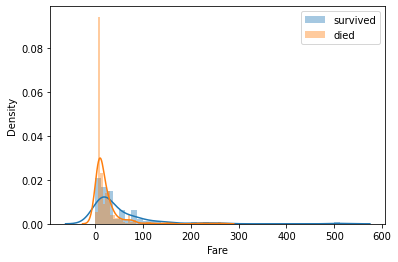

In [ ]:
#check for continuous variables
for col in df.select_dtypes('float'): 
  plt.figure()
  sns.distplot(survived_df[col], label='survived')
  sns.distplot(died_df[col], label='died')
  plt.legend()

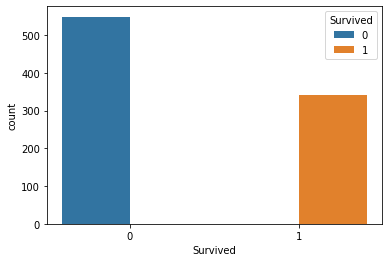

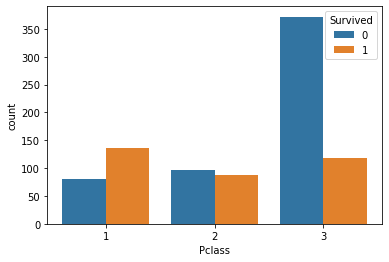

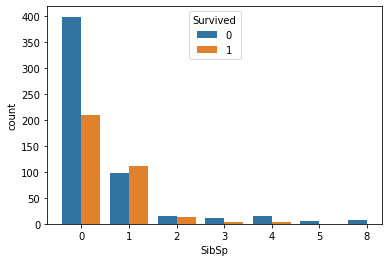

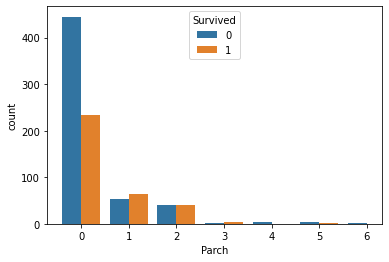

In [ ]:
#for discrete variables
for col in df.select_dtypes('int'): 
  plt.figure()
  sns.countplot(x=col, hue='Survived', data=df)
  plt.plot()

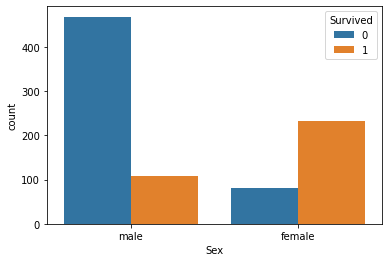

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)

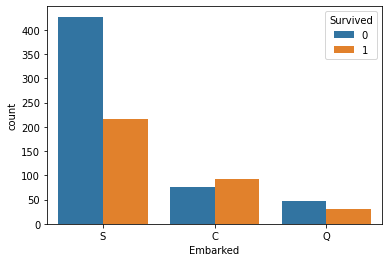

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=df)

In [ ]:
#sns.pairplot(df[float_columns])

### Corellations

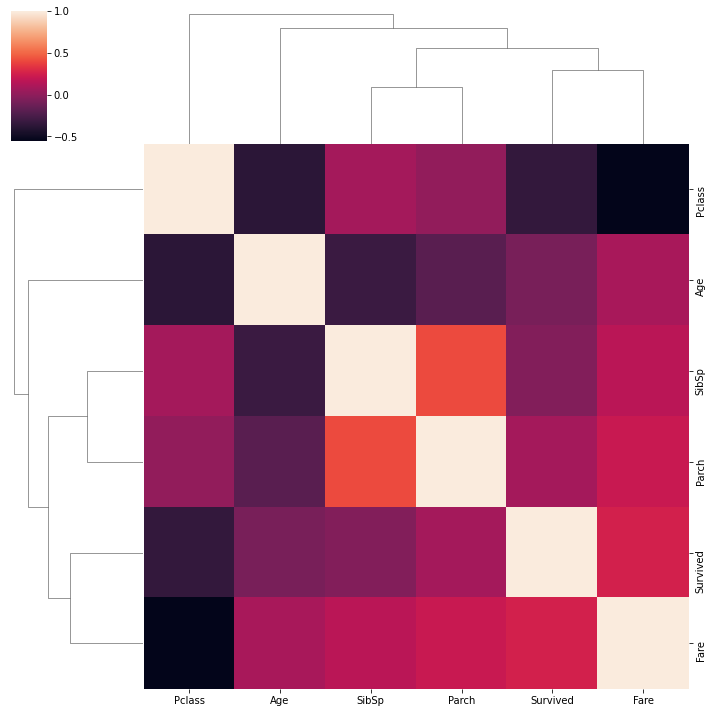

In [ ]:
sns.clustermap(df.corr())

Nothing much to say, except from the fact that there is some corellation between 'Parch' and 'SibSp' which is completely logical

### Sex/Embarked

In [ ]:
pd.crosstab(df['Sex'], df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


Did most men from Southampton died?

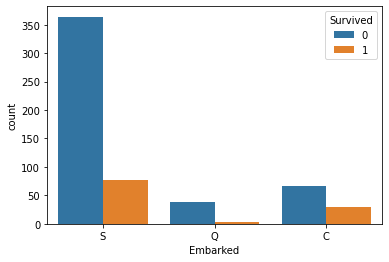

In [ ]:
male_df = df[df['Sex']=='male']
sns.countplot(x='Embarked', hue='Survived', data=male_df)

### Variable Cabin


In [ ]:
def cabininfo(df):
  if pd.isnull(df['Cabin']):
    return 'inconnu'
  else:
    return 'connu'  

In [ ]:
df['Cabin_info'] = df.apply(cabininfo, axis=1)

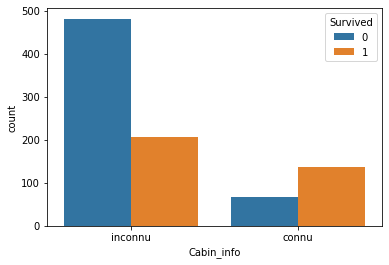

In [ ]:
sns.countplot(x='Cabin_info', hue='Survived', data=df)

# Pre-Processing

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### TrainTest - Cleaning - Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, LabelBinarizer, OneHotEncoder

In [ ]:
def cabininfo(df):
  if pd.isnull(df['Cabin']):
    return 'inconnu'
  else:
    return 'connu'  

In [ ]:
df['Cabin_info'] = df.apply(cabininfo, axis=1)
df = df.drop(columns=['Name','Ticket','Cabin'])

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
trainset['Survived'].value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [ ]:
testset['Survived'].value_counts()

0    110
1     69
Name: Survived, dtype: int64

#### Prepocessing by steps, to use depending of the needs




In [ ]:
def encodage(df):
    #code = {'negative':0,
            #'positive':1,
            #'not_detected':0,
            #'detected':1}
    
    #for col in df.select_dtypes('object').columns:
        #df.loc[:,col] = df[col].map(code)
       
        
    return df

In [ ]:
def feature_engineering(df):
    #df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    #df = df.drop(viral_columns, axis=1)
    return df

In [ ]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    #df = df.dropna(axis=0)
    df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)
    df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
    return  df

In [ ]:
def preprocessing(df):
    
    #df = encodage(df)
    #df = feature_engineering(df)
    #df = imputation(df)
    
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    
    print(y.value_counts())
    
    return X, y

In [ ]:
X_train, y_train = preprocessing(trainset) # à faire tourner absolutement 

0    439
1    273
Name: Survived, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)  # à faire tourner absolutement

0    110
1     69
Name: Survived, dtype: int64


### Evaluation procedure

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model, name):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(name)
    plt.legend()
    

### Modelling


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from xgboost import XGBClassifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

In [ ]:
numerical_pipeline = make_pipeline ( SimpleImputer(),
                                    StandardScaler())
categorical_pipeline = make_pipeline ( SimpleImputer(strategy='most_frequent'),
                                      OneHotEncoder())

In [ ]:
preprocessor = make_column_transformer ((numerical_pipeline, numerical_features),
                                        (categorical_pipeline, categorical_features))

In [ ]:
RandomForest = make_pipeline (preprocessor, RandomForestClassifier(random_state=0))
Adaboost = make_pipeline (preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline (preprocessor, SVC(random_state=0))
tree = make_pipeline (preprocessor, DecisionTreeClassifier(random_state=0))
KNN = make_pipeline (preprocessor, KNeighborsClassifier())
XGBoost = make_pipeline(preprocessor, XGBClassifier(random_state=0))

In [ ]:
dict_of_models = {'tree': tree,
                  'RandomForest': RandomForest,
                  'AdaBoost' : Adaboost,
                  'XGBoost' : XGBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

tree
[[92 18]
 [21 48]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

RandomForest
[[99 11]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

AdaBoost
[[97 13]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81 

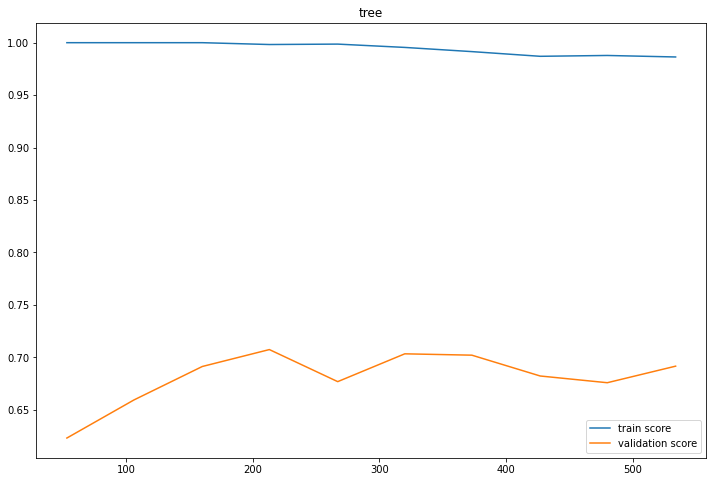

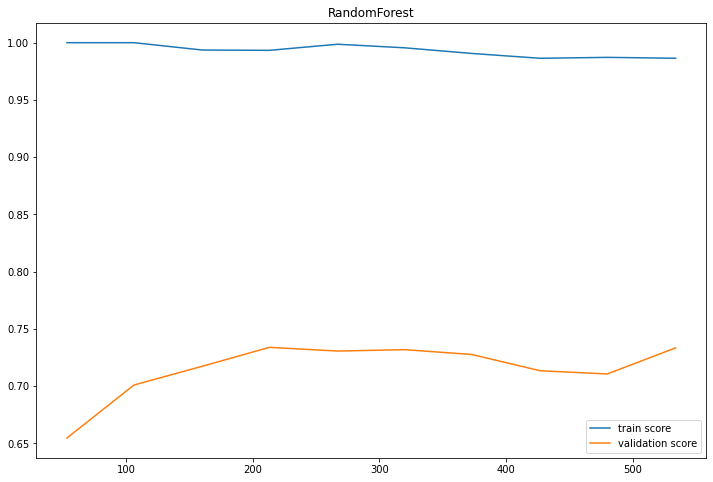

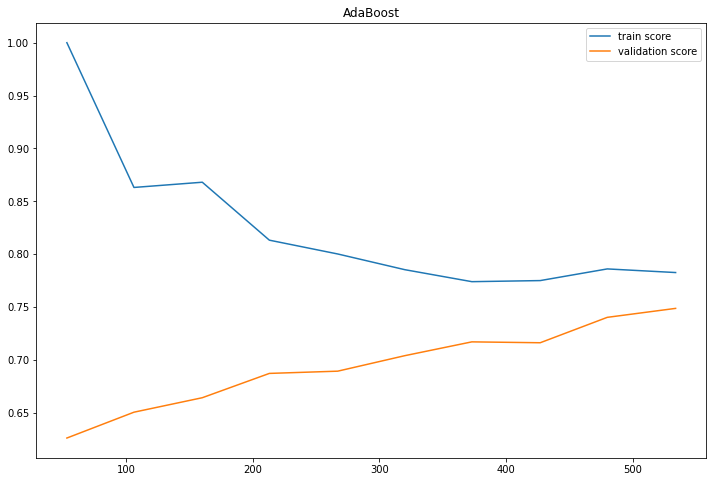

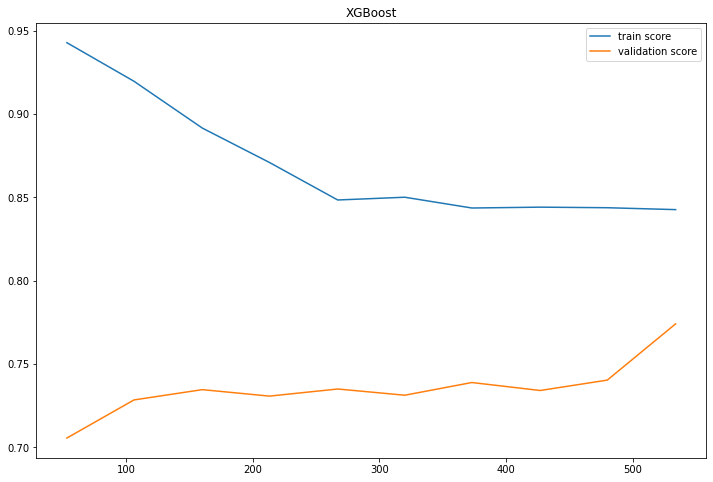

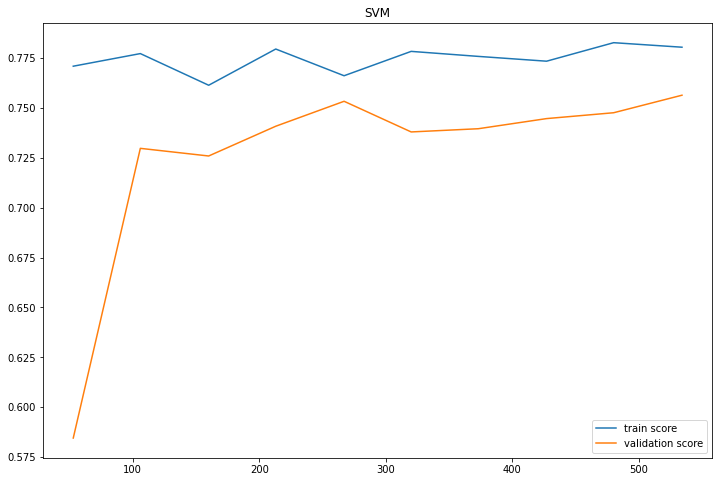

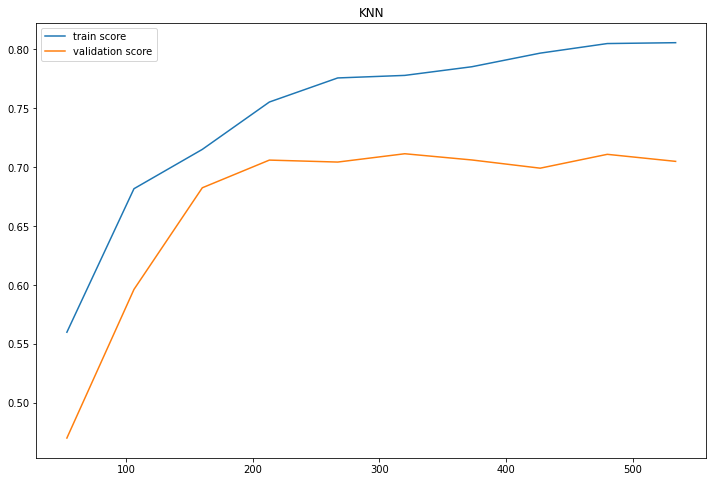

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model, name)

Since our dataset is unbalanced (90% of Actual Negatives), we'll focus on F1-score, as we want a balance between a model with a good precision and a good recall for the Class 1.

Here, AdaBoost has the highest F1-Score (0.77), and is not overfitting. It is by far the most promising model, so we'll enhance it.

### Optimization


The Kaggle competition set Accuracy as the metric for this challenge

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Adaboost optimization

In [ ]:
Adaboost

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8071772d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [ ]:
hyper_params = {
        "adaboostclassifier__n_estimators": np.arange(10,100,4),
        "adaboostclassifier__learning_rate": [0.05, 0.1, 0.5,1]}

In [ ]:
grid = GridSearchCV(Adaboost, hyper_params, scoring='accuracy', cv=4,
                          )

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'adaboostclassifier__learning_rate': 0.5, 'adaboostclassifier__n_estimators': 58}
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



[[93 17]
 [17 52]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



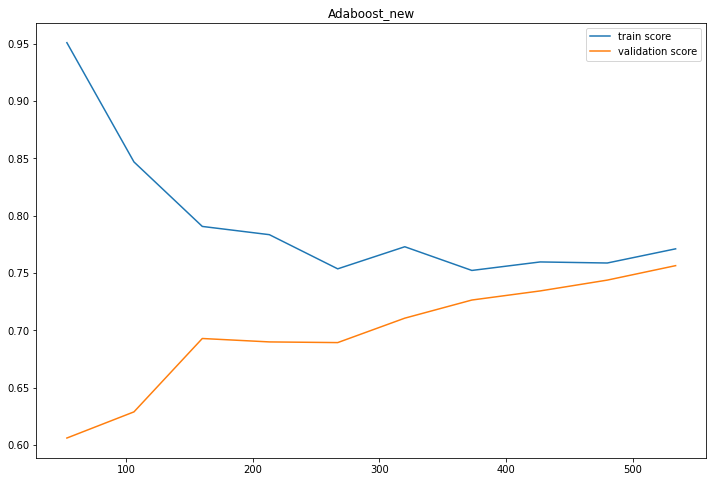

In [ ]:
evaluation(grid.best_estimator_, "Adaboost_new")

#### SVM optimization

In [ ]:
hyper_params1 = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000]
               }

In [ ]:
grid1 = RandomizedSearchCV(SVM, hyper_params1, scoring='accuracy', cv=4,
                          n_iter=40)

grid1.fit(X_train, y_train)

print(grid1.best_params_)

y_pred = grid1.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 15 is smaller than n_iter=40. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'svc__gamma': 0.001, 'svc__C': 3000}
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



[[95 15]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



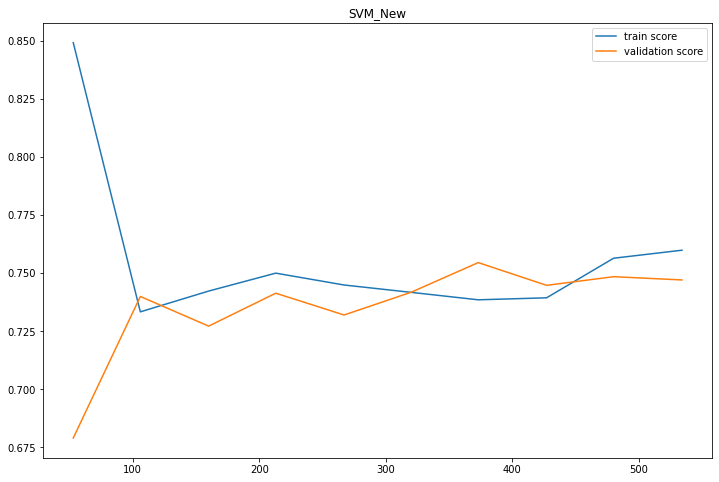

In [ ]:
evaluation(grid1.best_estimator_, "SVM_New")

The hyperparameter tuning doesn't improve our initial models so we stick with AdaBoost with ininial parameters.

### Precision Recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

In [ ]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
output.head()

,PassengerId,Survived
PassengerId,,
892,892,0
893,893,0
894,894,0
895,895,0
896,896,0


# Submission

In [ ]:
df_submit= submitset.copy()

In [ ]:
df_submit['Cabin_info'] = df_submit.apply(cabininfo, axis=1)
df_submit = df_submit.drop(columns=['Name','Ticket','Cabin'])

In [ ]:
predictions = Adaboost.predict(df_submit)

In [ ]:
df_submit['PassengerId'] = df_submit.index
output = pd.DataFrame({'PassengerId': df_submit['PassengerId'], 'Survived': predictions})


In [ ]:
output.to_csv('submission.csv', index=False)
